In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

movies_df = pd.read_csv(r'C:\Users\Administrator\Desktop\Studies\Python\Python_Project_Movie_Analysis\Python_Project_Movie_Analysis\0_Dataset\movies_metadata.csv', low_memory= False)

movies_df['release_date'] = pd.to_datetime(movies_df['release_date'],errors='coerce') # Convert data type of release_date to datetime.
movies_df['budget'] = pd.to_numeric(movies_df['budget'], errors='coerce') # Convert data type of budget to numeric.
movies_df['imdb_id'] = pd.to_numeric(movies_df['imdb_id'], errors='coerce') # Convert data type of imdb_id to numeric.
movies_df['id'] = pd.to_numeric(movies_df['id'], errors='coerce') # Convert data type of id to numeric.

def list_name(string_list_dict): # Convert the string list of dictionary into list of name.
    list_dict = ast.literal_eval(string_list_dict) if pd.notna(string_list_dict) else string_list_dict
    return [dict['name'] for dict in list_dict] if isinstance(list_dict,list) else []

movies_df['genres'] = movies_df['genres'].apply(lambda x: list_name(x))
movies_df['production_companies'] = movies_df['production_companies'].apply(lambda x: list_name(x))
movies_df['production_countries'] = movies_df['production_countries'].apply(lambda x: list_name(x))
movies_df = movies_df.dropna(subset= 'title', axis= 'index')

# Which movies are outliers in terms of profitability or audience reception?

### Profitability

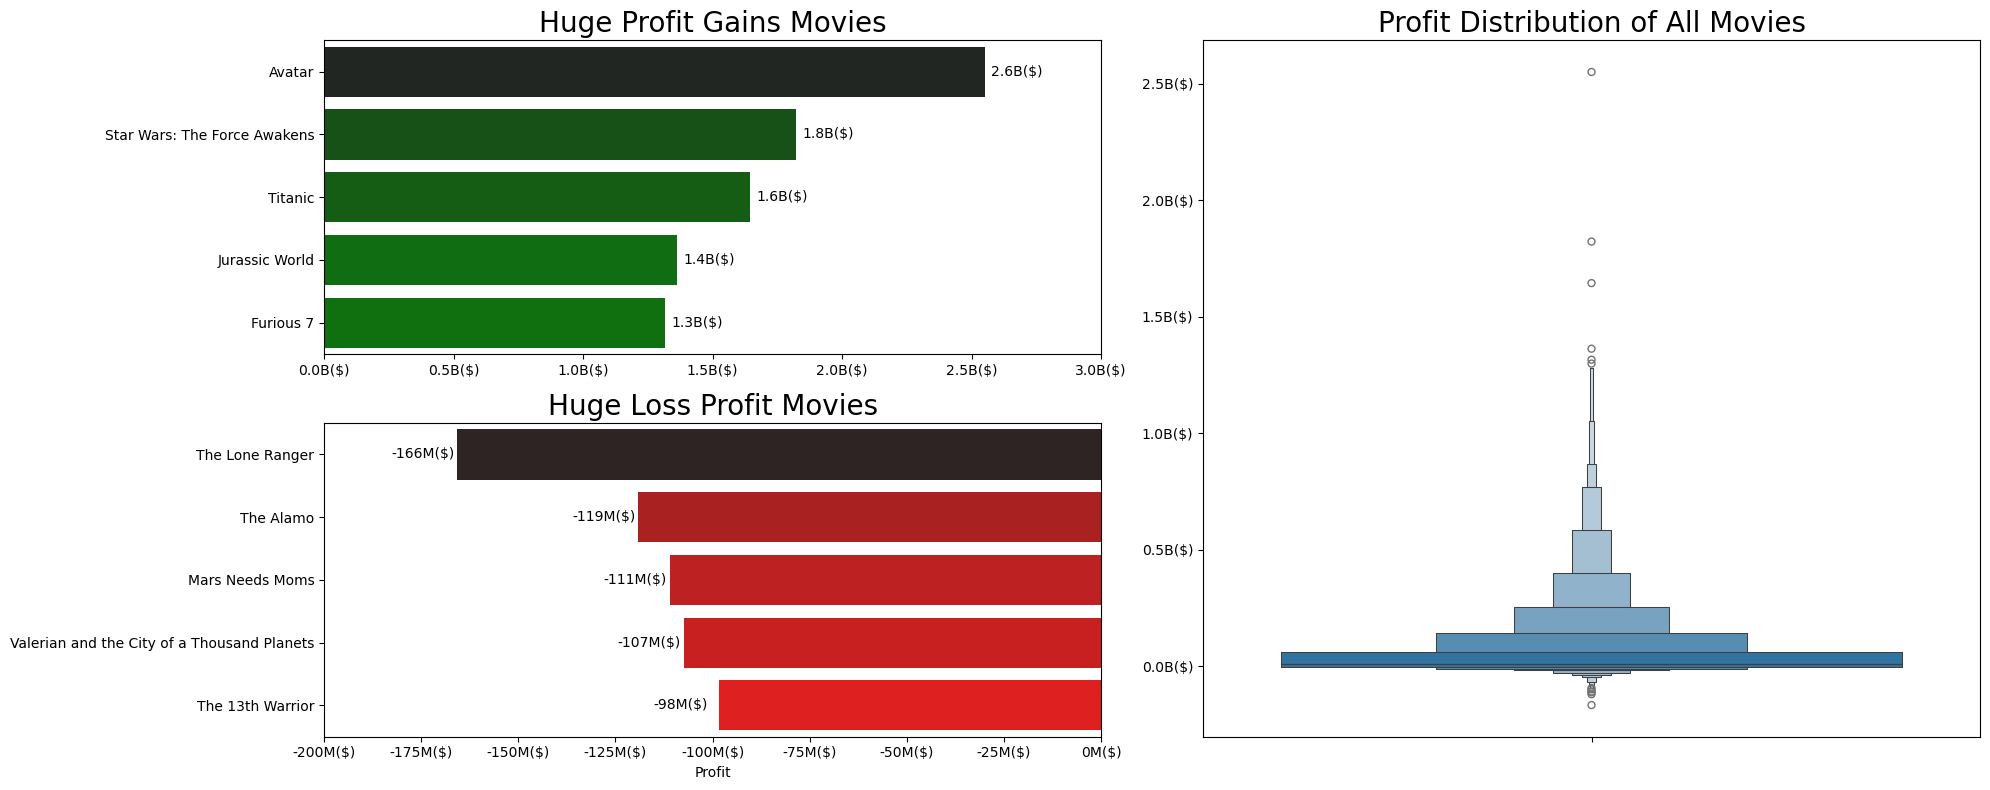

In [4]:
movies_df = movies_df[(movies_df['budget'] > 0) & (movies_df['revenue'] > 0)].copy()
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']

Q1 = movies_df['profit'].quantile(0.25)
Q3 = movies_df['profit'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR

outliers_profit = movies_df[(movies_df['profit'] < lower_bound) | (movies_df['profit'] > upper_bound)]
huge_gain_profit = movies_df[movies_df['profit'] > upper_bound].sort_values(by= 'profit', ascending= False).head(5)
huge_loss_profit = movies_df[movies_df['profit'] < lower_bound].sort_values(by= 'profit', ascending= True).head(5)

import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(20, 8))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1])

# First column, top and bottom rows
ax1 = fig.add_subplot(gs[0, 0])  # Row 0, Col 0
ax2 = fig.add_subplot(gs[1, 0])  # Row 1, Col 0

# Second column, spans both rows
ax3 = fig.add_subplot(gs[:, 1])  # All rows, Col 1


sns.barplot(
    data= huge_gain_profit
    ,x= 'profit'
    ,y= 'title'
    ,hue= 'profit'
    ,palette= 'dark:g_r'
    ,legend= False
    ,ax= ax1
)
ax1.set_title('Huge Profit Gains Movies', fontsize= 20)
ax1.set_ylabel('')
ax1.set_xlabel('')
ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,i: f'{x/1_000_000_000}B($)'))
ax1.set_xlim(0,3_000_000_000)
for i,profit in enumerate(huge_gain_profit['profit']):
    ax1.text(
        x= profit + 25_000_000
        ,y= i
        ,s= f'{profit/1_000_000_000:.1f}B($)'
        ,va= 'center'
    )


sns.barplot(
    data= huge_loss_profit
    ,x= 'profit'
    ,y= 'title'
    ,hue= 'profit'
    ,palette= 'dark:r'
    ,legend= False
    ,ax= ax2
)
ax2.set_title('Huge Loss Profit Movies', fontsize= 20)
ax2.set_ylabel('')
ax2.set_xlabel('Profit')
ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,i: f'{x/1_000_000:.0f}M($)'))
ax2.set_xlim(-200_000_000,0)
for i,profit in enumerate(huge_loss_profit['profit']):
    ax2.text(
        x= profit - 17_000_000
        ,y= i
        ,s= f'{profit/1_000_000:.0f}M($)'
        ,va= 'center'
    )

sns.boxenplot(
    data= movies_df['profit']
    ,ax=ax3
    )
ax3.yaxis.set_major_formatter(plt.FuncFormatter(lambda x,i: f'{x/1_000_000_000:.1f}B($)'))
ax3.set_ylabel('')
ax3.set_title('Profit Distribution of All Movies', fontsize= 20)

plt.tight_layout()
plt.show()


### Ratings

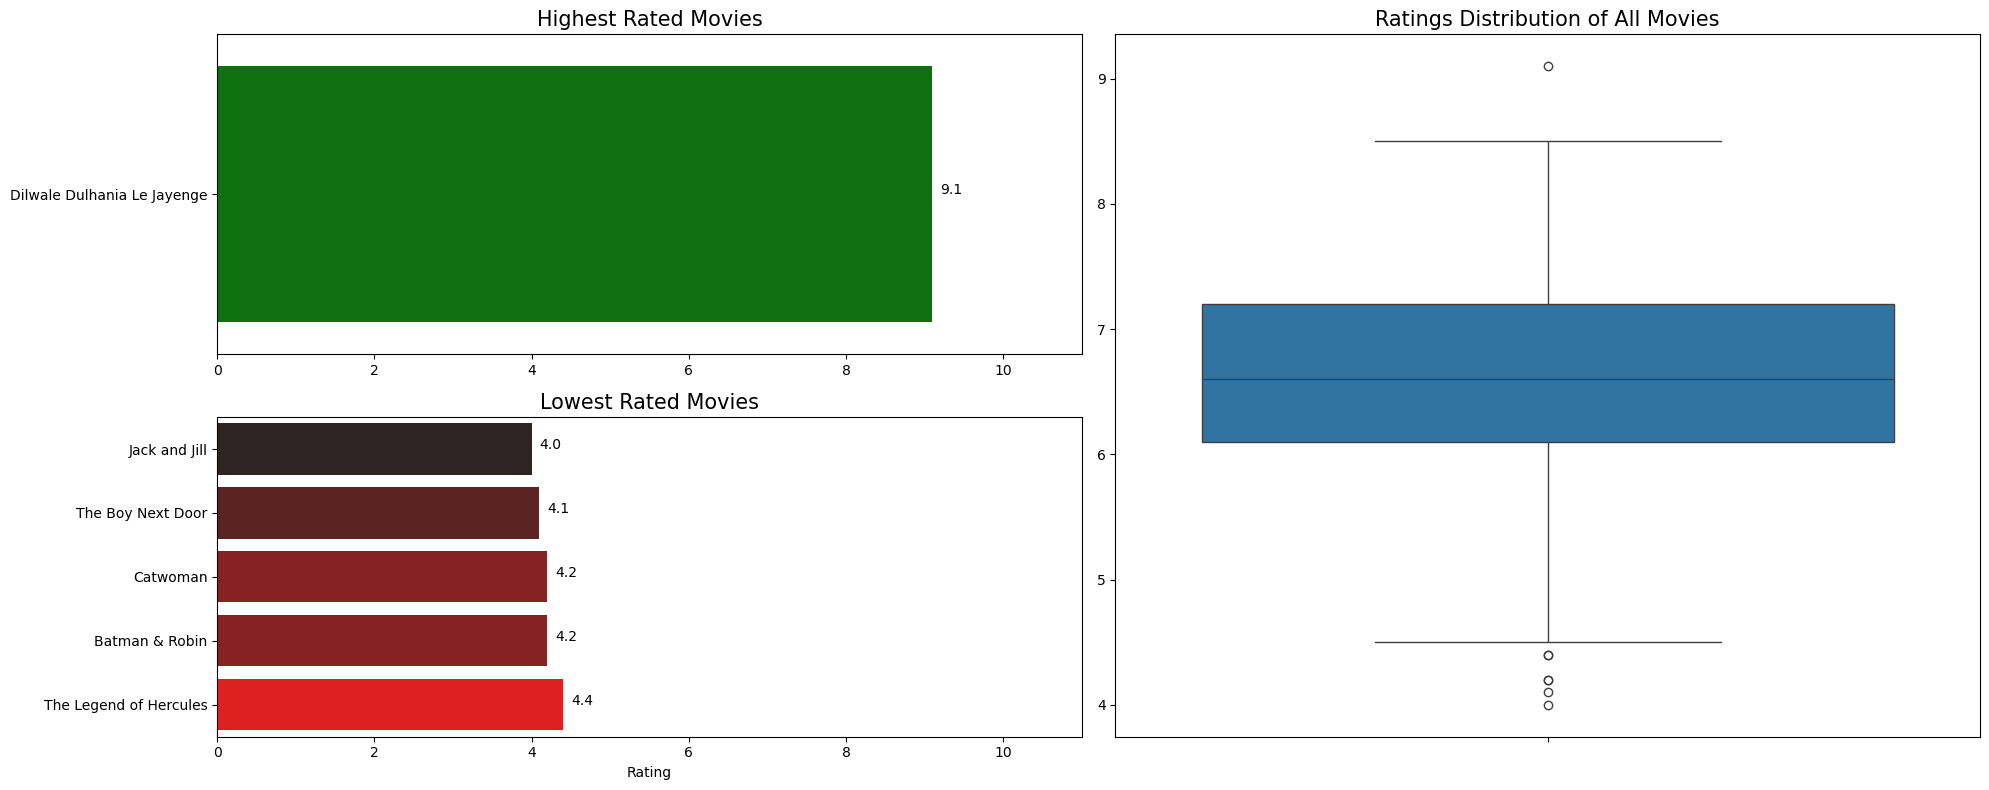

In [5]:

rated_movies = movies_df[movies_df['vote_count'] >= 500]


Q1 = rated_movies['vote_average'].quantile(0.25)
Q3 = rated_movies['vote_average'].quantile(0.75)
IQR = Q3 - Q1

low_ratings = Q1 - 1.5 * IQR
high_ratings = Q3 + 1.5 * IQR

lowest_ratings = rated_movies[rated_movies['vote_average'] < low_ratings].sort_values(by= 'vote_average', ascending= True).head(5)
highest_ratings = rated_movies[rated_movies['vote_average'] > high_ratings].sort_values(by= 'vote_average', ascending= False).head(5)

fig = plt.figure(figsize= (20, 8))
gs = gridspec.GridSpec(2,2,width_ratios=[1,1])

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[:,1])

sns.barplot(
    data= highest_ratings
    ,x= 'vote_average'
    ,y= 'title'
    ,hue= 'vote_average'
    ,palette= 'dark:g_r'
    ,legend= False
    ,ax= ax1
    )
ax1.set_title('Highest Rated Movies', fontsize= 15)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_xlim(0,11)

for i,value in enumerate(highest_ratings['vote_average']):
    ax1.text(value+.1,i,value)

sns.barplot(
    data= lowest_ratings
    ,x= 'vote_average'
    ,y= 'title'
    ,hue= 'vote_average'
    ,palette= 'dark:r'
    ,legend= False
    ,ax= ax2
    )
ax2.set_title('Lowest Rated Movies', fontsize= 15)
ax2.set_xlabel('Rating')
ax2.set_ylabel('')
ax2.set_xlim(0,11)

for i,value in enumerate(lowest_ratings['vote_average']):
    ax2.text(value+.1,i,value)

sns.boxplot(rated_movies['vote_average'], ax=ax3)
ax3.set_ylabel('')
ax3.set_title('Ratings Distribution of All Movies', fontsize= 15)

plt.tight_layout()
plt.show()